# **Loading Required Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPooling2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
import cv2
import os


# **Loading Images**

In [2]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 128
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [3]:
train = get_training_data('../input/chest-xray-pneumonia/chest_xray/chest_xray/train')
test = get_training_data('../input/chest-xray-pneumonia/chest_xray/chest_xray/test')
val = get_training_data('../input/chest-xray-pneumonia/chest_xray/chest_xray/val')

OpenCV(4.4.0) /tmp/pip-req-build-dglzv4yn/opencv/modules/imgproc/src/resize.cpp:3929: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.4.0) /tmp/pip-req-build-dglzv4yn/opencv/modules/imgproc/src/resize.cpp:3929: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.4.0) /tmp/pip-req-build-dglzv4yn/opencv/modules/imgproc/src/resize.cpp:3929: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.4.0) /tmp/pip-req-build-dglzv4yn/opencv/modules/imgproc/src/resize.cpp:3929: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



In [4]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

# **Visualizing Images**

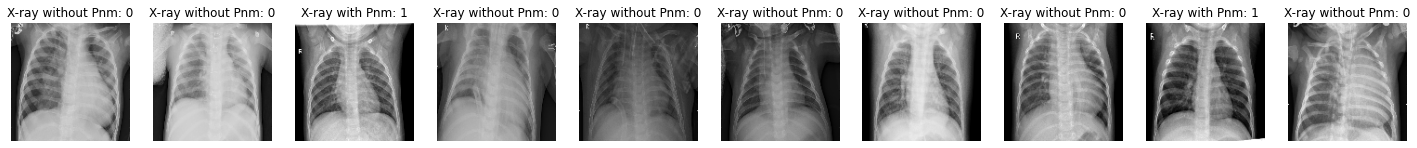

In [5]:
c = 10
resolution = 128
fig, subplots = plt.subplots(1, c)
fig.set_size_inches(25, 3)
for i in range(c):
    n = np.random.randint(0, len(x_train))
    num = y_train[n]
    word = "out" if num == 0 else "" 
    
    subplots[i].imshow(x_train[n].reshape((resolution, resolution)), cmap="gray")
    subplots[i].set_title(f"X-ray with{word} Pnm: {num}")
    subplots[i].axis("off")
plt.show()

# **PreProcessing**

In [6]:
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [7]:
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

# **Convolutional Neural Network**

In [8]:
input_shape = (128,128,1)
model = Sequential()
model.add(Conv2D(32,kernel_size = (2,2),strides = (1,1),activation = 'relu',input_shape = input_shape))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(64,kernel_size = (2,2),strides = (1,1),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(64,kernel_size = (2,2),strides = (1,1),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(128,kernel_size = (2,2),strides = (1,1),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(256,kernel_size = (2,2),strides = (1,1),activation = 'relu'))

model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(256, activation="linear"))
model.add(Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 127, 127, 32)      160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 64)        16448     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       3

In [9]:
model.compile(optimizer = 'rmsprop',loss = "binary_crossentropy",metrics = ['accuracy'])

In [10]:
model.fit(x_train,y_train,batch_size = 10,epochs = 30,validation_data = (x_val,y_val))

Epoch 1/30
522/522 [==============================] - 4s 7ms/step - loss: 0.2399 - accuracy: 0.9084 - val_loss: 0.3512 - val_accuracy: 0.8125
Epoch 2/30
522/522 [==============================] - 3s 6ms/step - loss: 0.1068 - accuracy: 0.9640 - val_loss: 0.1580 - val_accuracy: 0.9375
Epoch 3/30
522/522 [==============================] - 3s 6ms/step - loss: 0.0879 - accuracy: 0.9689 - val_loss: 0.3594 - val_accuracy: 0.8750
Epoch 4/30
522/522 [==============================] - 3s 6ms/step - loss: 0.0754 - accuracy: 0.9747 - val_loss: 0.4244 - val_accuracy: 0.8750
Epoch 5/30
522/522 [==============================] - 3s 7ms/step - loss: 0.0695 - accuracy: 0.9787 - val_loss: 0.4176 - val_accuracy: 0.8125
Epoch 6/30
522/522 [==============================] - 3s 6ms/step - loss: 0.0587 - accuracy: 0.9799 - val_loss: 0.2095 - val_accuracy: 0.9375
Epoch 7/30
522/522 [==============================] - 3s 6ms/step - loss: 0.0550 - accuracy: 0.9827 - val_loss: 0.2075 - val_accuracy: 0.9375
Epoch 

# **Model Testing**

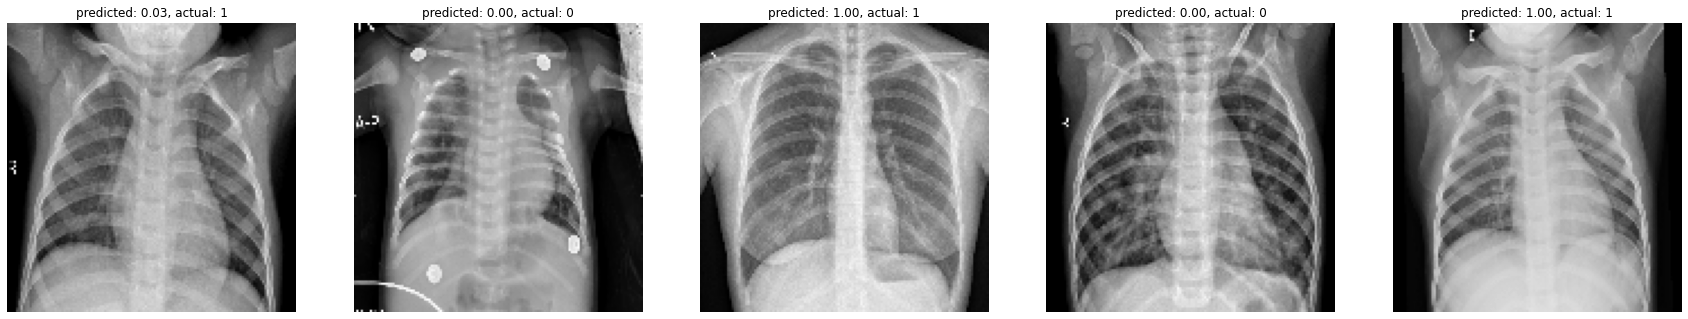

In [11]:
y_test_results = model.predict([x_test])

c = 5
fig, subplots = plt.subplots(1, c)
fig.set_size_inches(30, 9)
for i in range(c):
    n = np.random.randint(0, len(x_test))
    guess = str(round(y_test_results[n][0], 2)).ljust(4, "0")
    actual = y_test[n]

    subplot = subplots[i]
    subplot.imshow(x_test[n].reshape((resolution, resolution)), cmap="gray")
    subplot.set_title(f"predicted: {guess}, actual: {actual}")
    subplot.axis("off")
plt.show()